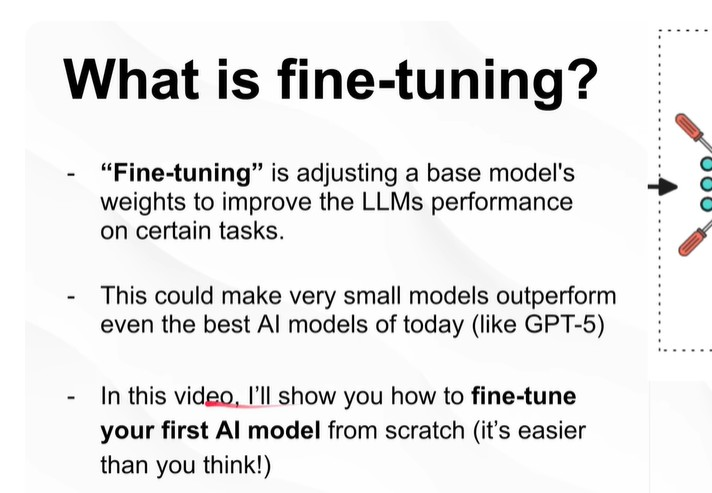

In [1]:
from PIL import Image
Image.open(r'/content/FINETUNING_LLM.jpg')

In [ ]:
max_seq_length=1024
model,tokenizer=FastLanguageModel.from_pretrained(model_name="unsloth/gpt-oss-20b",dtype=dtype,max_length_seq=max_length_seq,full_finetuning=False)

In [ ]:
## Reasoning effort gpt oss

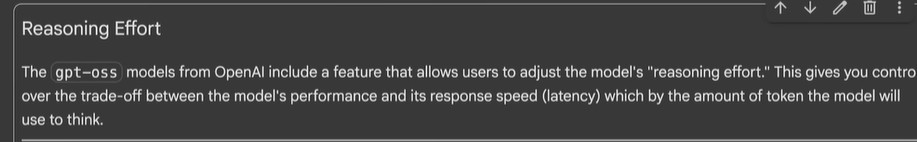

In [2]:
Image.open(r'/content/gpt_oss_1.jpg')

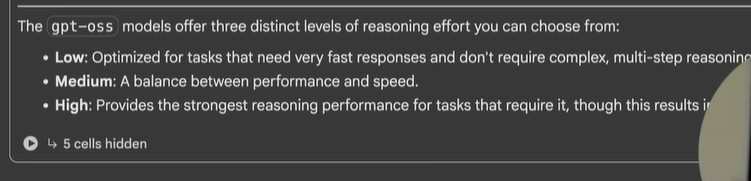

In [3]:
Image.open(r'/content/gpt_oss_2.jpg')

In [ ]:
from datasets import load_dataset
dataset=load_dataset("internlm/Agent-FLAN",data_files={"train":"data/agent_in_struct_react.json"})

In [ ]:
dataset=standerzie_sharegpt(dataset)
dataset=dataset.map(lambda x:tokenizer(x["text"]),batched=True)


In [ ]:
def formatting_prompts(examples):
  convos=examples["messages"]
  texts=[tokenizer]
  return {"text"}
dataset=load_dataset()

In [ ]:
## to format dataset we apply our version of GPT OSS PROMPT

In [ ]:
from unsloth.chat_templates import standerzie_sharegpt
dataset=standerzie_sharegpt(dataset)
dataset=dataset.map(lambda x:tokenizer(x["text"]),batched=True))

In [ ]:
print(dataset[0]["text"])

In [ ]:
## Unique about GPT OSS

In [ ]:
from trl import SFTTrainer,SFTConfig

In [ ]:
trainer=SFTTrainer(model=model,tokenizer=tokenizer,dataset=dataset,max_seq_length=max_seq_length,warmup_steps=5,output_dir=output_dir,report=None,logging_steps=1,logging_dir=logging_dir,per_device_train_batch_size=1,gradient_accumulation_steps=4,train_dataset=dataset,tokenizer=tokenizer)


In [ ]:
## we use unsloth train_on_completion  method to train only on the assistant output and ignore the loss  on the user's input.This helps increases the accuracy of finetunes and lower loss as well

In [ ]:
from unlsoth.chat_templates import train_on_reponse_only
gpt_oss_kwargs=dict(instruction_part="|<start|>user<|message>")
trainer=train_on_reponse_only(trainer,gpt_oss_kwargs)

In [ ]:
trainer_stats=trainer.train()

In [ ]:
## Inference

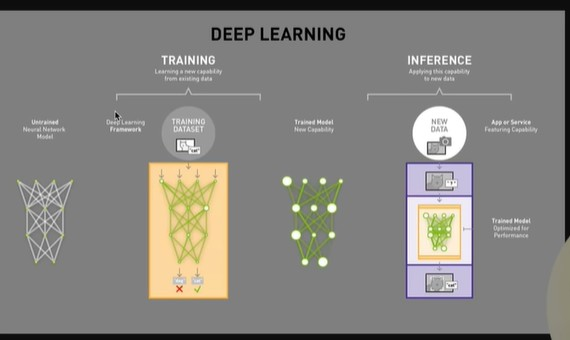

In [4]:
from PIL import Image
Image.open(r'/content/inference.jpg')

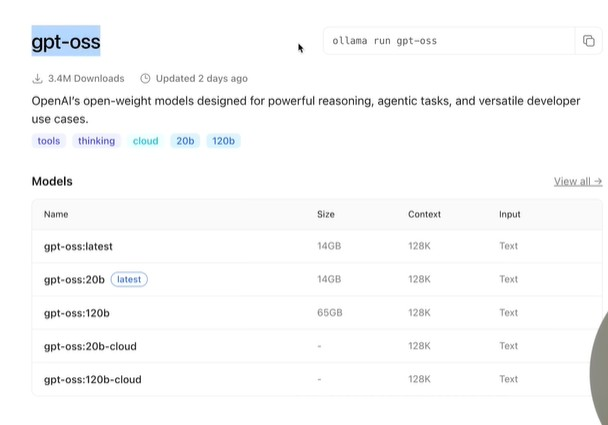

In [5]:
from PIL import Image
Image.open(r'/content/gpt_oss_3.jpg')

In [ ]:
## saving loading finetuned models as LORA Adapter we can use push_o_hub or save_pretrained for a local save

In [ ]:
model.save_pretrained("finetuned_model")


In [ ]:
# to run the fine tuend model we have to run below

In [ ]:
from ast import TypeVarTuple
if false:
  from unsloth import FastLanguageModel
  model,tokenizer=FastLanguageModel.from_pretrained(model_name="finetuned_model",max_length=1024,dtype=None,load_in_4bit=True)
  messages=[{"role":"system","content":"reasoning language: French \n\n Youre a helpful language model"}]
  inputs=tokenizer.apply_chat_template(messages,add_generation_prompt=True,return_tensors="pt",return_dict=True,reasoning_effor="high")

  inputs=inputs.to(model.device)


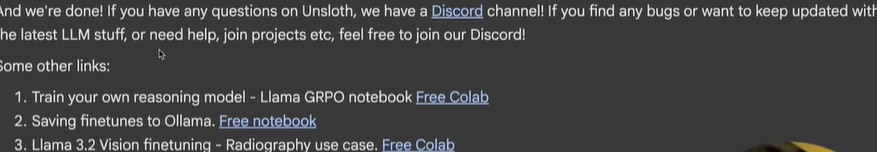

In [6]:
Image.open(r'/content/FINETUNING_LLM_4._1jpg.jpg')